# Detectando objetos com YOLO v4 - implementação com OpenCV

## Etapa 1 - Importando as bibliotecas

In [ ]:
import cv2
print(cv2.__version__)

4.8.0


In [90]:
import cv2
import numpy as np
import time
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile
print(cv2.__version__)

4.8.0


## Etapa 2 - Conectando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Etapa 3 - Carregando os arquivos do modelo treinado

In [ ]:
path='/content/gdrive/MyDrive/Yolo/YoloV4Files.zip'
zip_object=zipfile.ZipFile(file=path,mode='r')#Get the file
zip_object.extractall('./')#Exctact the zipped file
zip_object.close()#close the file

In [ ]:
labels_path = os.path.sep.join(['/content/cfg', 'coco.names'])#Mix two strings
labels_path

'/content/cfg/coco.names'

In [ ]:
LABELS = open(labels_path).read().strip().split('\n')# It reads the label of the file and separete them in array in each \n
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
len(LABELS)#Number of objects

80

In [ ]:
weights_path = os.path.sep.join(['/content', 'yolov4.weights'])#Mix two strings
config_path = os.path.sep.join(['/content/cfg', 'yolov4.cfg'])#Mix two strings
weights_path, config_path

('/content/yolov4.weights', '/content/cfg/yolov4.cfg')

In [ ]:
net = cv2.dnn.readNet(config_path, weights_path)#Load the Deep Neural Network using the config and the weights

In [ ]:
net

< cv2.dnn.Net 0x7f97d0f51e90>

## Etapa 4 - Definindo mais configurações para a detecção

In [ ]:
COLORS=np.random.randint(0,255,size=(len(LABELS), 3), dtype='uint8')#Define a random color for the bouding boxes and texts
print(COLORS)

[[100 188 233]
 [ 66 185  84]
 [189 240 224]
 [239 127 239]
 [ 76 106 202]
 [227  90 243]
 [  3 147 219]
 [108   5 197]
 [ 37 172 128]
 [163  10 173]
 [109  49 123]
 [190 150 232]
 [ 64  10 172]
 [106  37  96]
 [ 70  75 227]
 [ 23 136  18]
 [ 63  41 142]
 [120 219 129]
 [205  62 196]
 [171 118  48]
 [169  80 163]
 [125 209  56]
 [208  38  76]
 [  7 210 146]
 [121 243 136]
 [ 15 133 174]
 [ 72 123 109]
 [156 247 203]
 [197 225  78]
 [236 220 249]
 [215 201  26]
 [ 63  26 190]
 [190 159 251]
 [252  69 191]
 [244  86  48]
 [127  13 101]
 [ 84  16  42]
 [184  42  89]
 [240  81  77]
 [113 136  34]
 [ 40 183  92]
 [ 65 236  10]
 [ 14 102  43]
 [139  63  25]
 [166  73 186]
 [ 38  79  24]
 [168 138  70]
 [228  20 130]
 [219 103 237]
 [110  31 203]
 [102 138  99]
 [ 65   6  30]
 [102 239 133]
 [217 106 169]
 [163  30 164]
 [241 201 190]
 [243  14 200]
 [225 132 160]
 [124  82 230]
 [132 228 162]
 [ 36 201  17]
 [ 25 165 234]
 [134 229 155]
 [ 80 169  94]
 [184 166  98]
 [ 32  67  50]
 [127 111 

In [ ]:
ln = net.getLayerNames()# Return all the deep neural network layer
print('Todas as camadas')
print(ln)#Show the layers
print('Total de camadas: ' + str(len(ln)))#Show the number of layers

Todas as camadas
('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_35', 'conv_35', 'bn_35', 'mish_36', 'shortcut_36', 'conv_37', 'bn_37', 'mish_38', 'conv_38

In [ ]:
print('Camadas de saída')
print(net.getUnconnectedOutLayers())
# The output layers are the layers that are not connect in other layers. It means they are the last layer in a sequence.
# Because of that, we use the net.getUnconnectedOutLayers() function to get the outputs layers

Camadas de saída
[327 353 379]


**`[ ! ] Atenção:`** se estiver executando na versão 3.10 do Python (ou superior) troque `ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]` por:
> `ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]`

No segundo semestre de 2023, o Colab passou a atribuir automaticamente o Python 3.10 às sessões, portanto deixaremos assim

In [ ]:
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]#Storage the name of the output layers
ln

['yolo_139', 'yolo_150', 'yolo_161']

## Etapa 5 - Carregando a imagem onde será feita a detecção

In [91]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

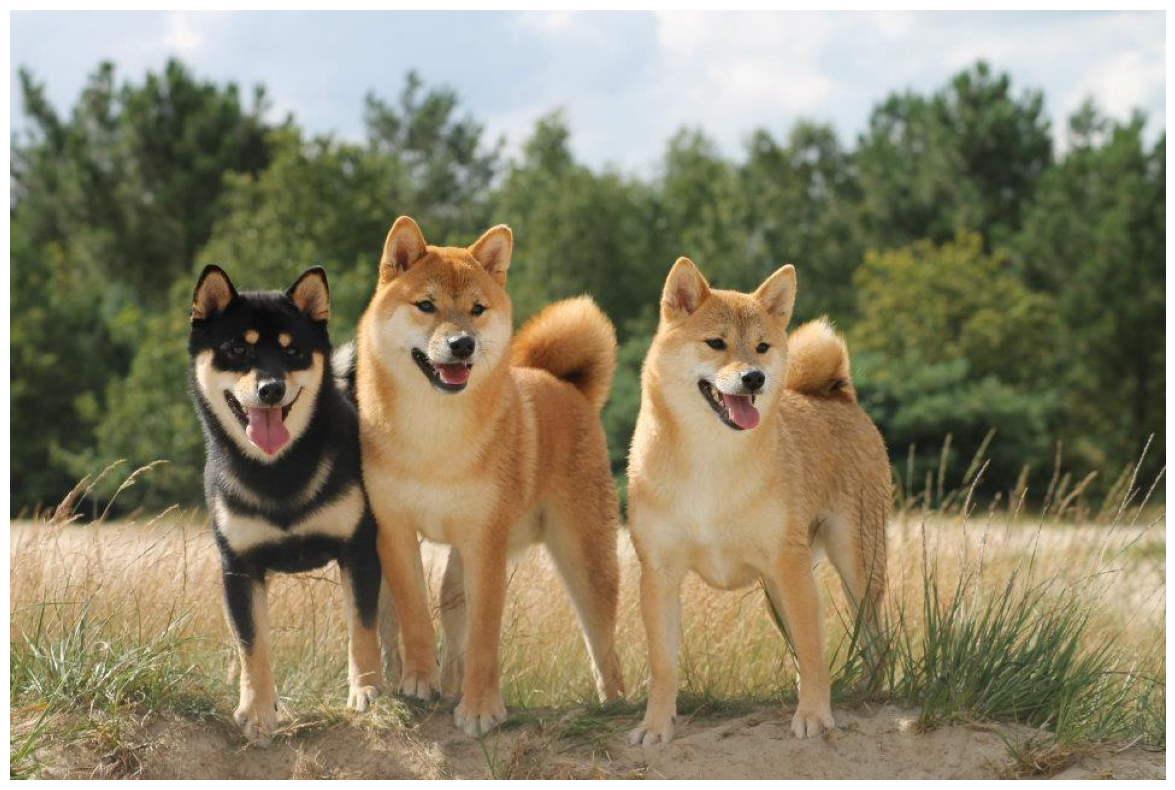

In [92]:
imagem = cv2.imread('/content/gdrive/My Drive/Yolo/imagens/cachorros.jpg')
mostrar(imagem)

In [93]:
type(imagem)

numpy.ndarray

In [94]:
imagem_cp = imagem.copy()

In [95]:
(H, W) = imagem.shape[:2]
print('Altura: ' + str(H) + '\nLargura: ' + str(W))

Altura: 640
Largura: 960


## Etapa 6 - Processando a imagem de entrada

In [112]:
def detectionFunction(net, imagem, mostrar_texto=True):
  inicio = time.time()

  blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB=True, crop=False)#Transform image to the blob format
  net.setInput(blob)#Send image to the input of the Neural Network
  layerOutputs = net.forward(ln)#Get the output of the neural network

  termino = time.time()

  if mostrar_texto:
    print("YOLO levou {:.2f} segundos".format(termino - inicio))

  return net, imagem, layerOutputs

In [113]:
net, imagem, layer_outputs=detectionFunction(net,imagem)

YOLO levou 2.50 segundos


## Etapa 7 - Definindo as variáveis

In [98]:
#DEFINE THE DETECTION VARIABLES!!
threshold = 0.5
threshold_NMS = 0.3#non-max-supression trashold
caixas = []
confiancas = []
IDclasses = []

## Etapa 8 - Realizando a predição

In [99]:
len(layer_outputs)#The Yolo have three output layers

3

In [100]:
layer_outputs[0]# Show the first scale of prediction
#Each line is an object detected
#Each column is the category of the object
#The cell is the chance of that object really be there
#Yolo finds a lot of objects in the images, but most of them are not real

array([[0.01100558, 0.01021743, 0.02264772, ..., 0.        , 0.        ,
        0.        ],
       [0.01492394, 0.01543288, 0.03303435, ..., 0.        , 0.        ,
        0.        ],
       [0.01701084, 0.01489796, 0.05110351, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9912933 , 0.99049157, 0.02108764, ..., 0.        , 0.        ,
        0.        ],
       [0.98667467, 0.9842644 , 0.03099856, ..., 0.        , 0.        ,
        0.        ],
       [0.9830682 , 0.9859079 , 0.0597507 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
layer_outputs[1]# Show the second scale of prediction# Show the first scale of prediction
#Each line is an object detected
#Each column is the category of the object
#The cell is the chance of that object really be there
#Yolo finds a lot of objects in the images, but most of them are not real

array([[0.03031929, 0.0320848 , 0.10433294, ..., 0.        , 0.        ,
        0.        ],
       [0.0329858 , 0.03253518, 0.13059318, ..., 0.        , 0.        ,
        0.        ],
       [0.0312387 , 0.03151371, 0.15157267, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96770096, 0.96682906, 0.06866277, ..., 0.        , 0.        ,
        0.        ],
       [0.96435654, 0.96775067, 0.09513659, ..., 0.        , 0.        ,
        0.        ],
       [0.9661032 , 0.9677124 , 0.10772248, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
layer_outputs[2]# Show the third scale of prediction
#Each line is an object detected
#Each column is the category of the object
#The cell is the chance of that object really be there
#Yolo finds a lot of objects in the images, but most of them are not real

(array([[[[ 7.7170990e+01,  8.7103798e+01,  8.6914062e+01, ...,
            8.7431877e+01,  8.7065872e+01,  3.5266248e+02],
          [ 9.0815262e+01,  3.7508198e+01,  3.8775753e+01, ...,
            3.8299919e+01,  3.8236488e+01,  2.8442004e+02],
          [ 9.1090668e+01,  3.7323078e+01,  3.7115345e+01, ...,
            3.8160339e+01,  3.7935219e+01,  2.8648611e+02],
          ...,
          [ 9.7727463e+01,  3.2934677e+01,  1.4994210e+01, ...,
            6.6278976e+01,  3.8621605e+01,  2.3745059e+02],
          [ 7.7586662e+01,  5.7831261e+01,  9.5881386e+01, ...,
            7.5018539e+01,  7.5315727e+01,  2.1158968e+02],
          [ 8.2868248e+01,  6.4286255e+01,  8.7765923e+01, ...,
            7.9222511e+01,  8.5037979e+01,  2.2743925e+02]],
 
         [[-1.5793077e-18,  3.3448706e+00,  3.4340491e+00, ...,
            3.2170746e+00,  3.3438861e+00,  4.9987019e+01],
          [-7.1222892e-26,  4.5667524e+00,  4.7086082e+00, ...,
            4.2993298e+00,  4.5285864e+00,  6.9591

In [62]:
len(layer_outputs[2][0])
#Yolo have, initially, 80 classes of objects that can be detected.
#But, when we look at one individual line length in the table, we see "85" and not "80"
#Each column in this individual line represents the chances of that object really be there, so it have 80 lines for represent the chance of that object be there
#and other 5 lines that represent informations about the bouding box of that object detected
# Those 5 parameters are:
# Pc=> Probability of exist an object in this bouding box(dont matter which object it is)
# Bx and Bx => Positions where the bouding box starts
# Bh and Bw => Width and height of the bouding box
#TO UNDERSTAND IT BETTER, MUST WATCH THE LESSON “23. Detecção de objeto” AT 4:35.

85

In [ ]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [59]:
teste = np.array([0.10, 0.80, 0.10])

In [114]:
def resultProcessing(detection,_threshold, caixas, confiancas, IDclasses):
  scores = detection[5:] #It storage the array with the chances of exist a object in each bouding box found
  classeIndex = np.argmax(scores) #It gets the index of the max value in the array
  confianca = scores[classeIndex] #Storage the value of the biggest confidence
  if confianca > threshold:#If the confidence be biggest than the threshold, create the bouding box

    caixa = detection[0:4] * np.array([W, H, W, H])#Multiply the detection array values for the width and height to define the real bouding box
    (centerX, centerY, width, height) = caixa.astype('int')
    #Calculates the top-left position of the bouding box
    x = int(centerX - (width / 2))
    y = int(centerY - (height / 2))

    caixas.append([x, y, int(width), int(height)])#Storage all the bouding boxes informations
    confiancas.append(float(confianca))#Storage all the confidence
    IDclasses.append(classeIndex)#Storage all the ID of the classes
  return caixas, confiancas, IDclasses

In [115]:
for output in layer_outputs:
  for detection in output:
    caixas, cofiancas, IDclasses = resultProcessing(detection,threshold, caixas, confiancas, IDclasses)

In [ ]:
print(caixas), len(caixas)

[[145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406], [145, 200, 186, 380], [275, 165, 235, 438], [141, 205, 189, 397], [274, 195, 235, 405], [495, 207, 237, 402], [497, 216, 235, 411], [279, 174, 230, 417], [280, 173, 228, 420], [134, 204, 169, 401], [137, 204, 164, 401], [142, 210, 179, 389], [142, 208, 178, 391], [277, 196, 234, 402], [277, 193, 234, 408], [502, 208, 231, 404], [504, 207, 230, 406]]


(None, 32)

In [ ]:
print(confiancas), len(confiancas)

[0.6059548854827881, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.6623756885528564, 0.6959598064422607, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283, 0.6059548854827881, 0.9570456743240356, 0.889125406742096, 0.9090498685836792, 0.9525650143623352, 0.7894679307937622, 0.9860403537750244, 0.9869317412376404, 0.6623756885528564, 0.6959598064422607, 0.9729039072990417, 0.9767161011695862, 0.8875229358673096, 0.8976888060569763, 0.9810120463371277, 0.9824249744415283]


(None, 32)

In [ ]:
print(IDclasses), len(IDclasses)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


(None, 32)

## Etapa 9 - Aplicando a Non-Maxima Suppression

In [116]:
#It applies the Non-Max Suppresion threshold, selecting the boxes with more confidence
objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)

In [66]:
objs

array([ 7, 15, 11], dtype=int32)

In [ ]:
print(objs.flatten())

[ 7 15 11]


In [ ]:
confiancas[7], confiancas[15], confiancas[11]

(0.9869317412376404, 0.9824249744415283, 0.9767161011695862)

In [ ]:
confiancas[0]

0.6059548854827881

## Etapa 10 - Mostrando o resultado da detecção na imagem

In [138]:
def funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS, mostrar_texto=True):
  (x, y) = (caixas[i][0], caixas[i][1])#Get the top-left position of the bouding box
  (w, h) = (caixas[i][2], caixas[i][3])#Get the width and height of the bouding box
  cor = [int(c) for c in COLORS[IDclasses[i]]]#Get a random color in the random color array
  cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)#Defines a bounding box in the image
  fundo = np.full((imagem.shape), (0,0,0), dtype=np.uint8)#Create the background of the text
  texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])#Define the text of the bouding box

  cv2.putText(fundo, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)

  fx,fy,fw,fh = cv2.boundingRect(fundo[:,:,2])

  cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2)

  cv2.rectangle(imagem, (fx, fy), (fx + fw, fy + fh), cor, -1)
  cv2.rectangle(imagem, (fx, fy), (fx + fw, fy + fh), cor, 3)
  cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)

  if mostrar_texto:
    print("> " + texto)
    print(x,y,w,h)

  return imagem,x,y,w,h

> dog: 0.9869
280 173 228 420


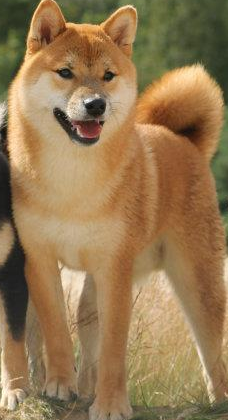

> dog: 0.9824
504 207 230 406


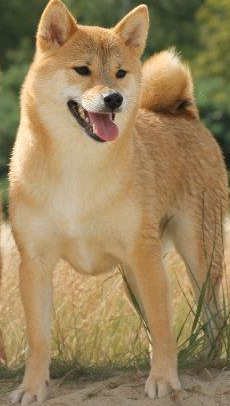

> dog: 0.9767
142 208 178 391


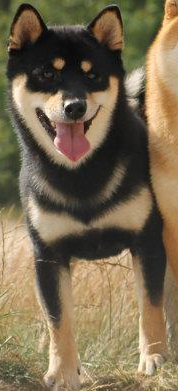

In [139]:
if len(objs) > 0:#If exist some object detected
  for i in objs.flatten():#For each object
    imagem, x, y, w, h = funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS)
    objeto = imagem_cp[y:y + h, x:x + w]#Cut the image showing just the bouding box content
    cv2_imshow(objeto)

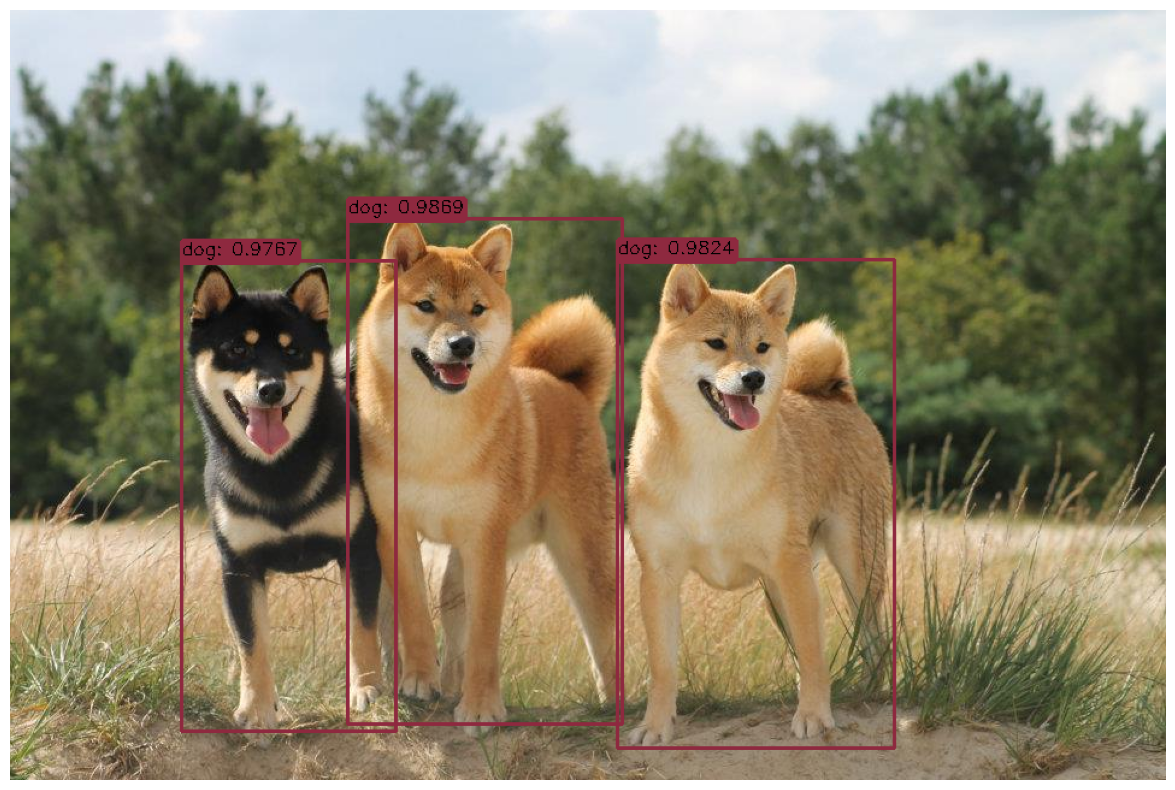

In [140]:
mostrar(imagem)

In [ ]:
cv2.imwrite('resultado.jpg', imagem)

True

In [ ]:
!cp ./resultado.jpg /content/gdrive/My\ Drive/Cursos\ -\ recursos/YOLO/imagens/resultado_cachorro.jpg

## Etapa 11 - Processando mais de uma imagem


In [ ]:
path = '/content/gdrive/MyDrive/Yolo/imagens/fotos_teste.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [141]:
diretorio_fotos = 'fotos_teste'
caminhos = [os.path.join(diretorio_fotos, f) for f in os.listdir(diretorio_fotos)]
print(caminhos)

['fotos_teste/gato04.jpg', 'fotos_teste/dog.jpg', 'fotos_teste/person.jpg', 'fotos_teste/img-canecas.jpg', 'fotos_teste/cachorros02.jpg', 'fotos_teste/gato02.jpg', 'fotos_teste/gato03.jpg', 'fotos_teste/cachorros.jpg']


In [142]:
for caminho_imagem in caminhos:
  try:
    imagem = cv2.imread(caminho_imagem) #Read the image inside the array of images directories
    imagem_cp = imagem.copy()#Copy the original image
    (H, W) = imagem.shape[:2]#Get the height and width
  except:
    print('Erro ao carregar a imagem -> ' + caminho_imagem)
    continue

  net, imagem, layer_outputs = detectionFunction(net, imagem)#Try detect the objects in the image

  caixas = []
  confiancas = []
  IDclasses = []

  for output in layer_outputs:#Pass in each output layer
    for detection in output:#Pass in each object detected
      caixas, confiancas, IDclasses = resultProcessing(detection, threshold, caixas, confiancas, IDclasses)#Process the information. Create the bouding boxes.

  objs = cv2.dnn.NMSBoxes(caixas, confiancas, threshold, threshold_NMS)#Perform the Non-max suppression(NMS)

  if len(objs) > 0:#If exist some object
    for i in objs.flatten():#In each object
      imagem, x, y, w, h = funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS)

  mostrar(imagem)

Output hidden; open in https://colab.research.google.com to view.